# Erkundung und Visualisierung großer Datenmengen
Bisher haben Sie nur einen kurzen Blick auf die Daten geworfen, um ein allgemeines Verständnis für die Art der Daten zu bekommen, die Sie untersuchen wollen. Jetzt geht es darum, ein wenig in die Tiefe zu gehen. Vergewissern Sie sich zunächst, dass Sie die Testdaten beiseite gelegt haben und nur den Trainingsdatensatz erkunden. 
Lassen Sie uns zunächst eine Kopie erstellen, damit Sie damit spielen können, ohne die dem Trainingsset schaden: 

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

# Datenbeschaffung / Einlesen einer csv Datei wie in Abschnitt 2 beschrieben
def load_housing_data():
    csv_path = os.path.join("datasets/housing/housing.csv")
    return pd.read_csv(csv_path)


housing = load_housing_data()
# Erstellung income category Attribut mit fünf Kategorien
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

# Basierend auf dem Kategorie-Attribut wird nun eine stratifizierte Stichprobe gezogen
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

housing = strat_train_set.copy()

Mit der plot-Methode lassen sich Daten einfach visulaisieren.
Alle Paramter werden hier erläutert:
https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

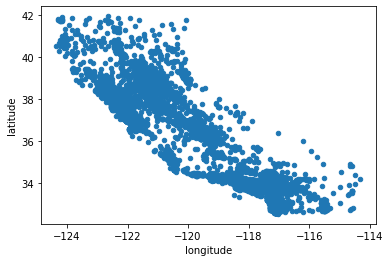

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude")

Wenn die Dichte der Datenpunkte auch visulaisiert werden soll, eignet es sich, das Attribut alpha auf den Wert 0.1 zu setzen.

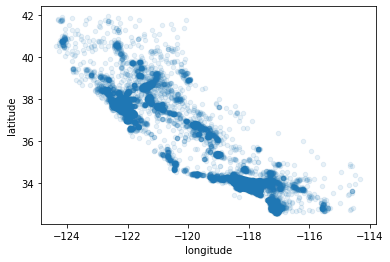

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Betrachten wir nun die Immobilienpreise. Der Radius jedes Kreises repräsentiert die Einwohnerzahl des Bezirks (Option s), und die Farbe repräsentiert den Preis (Option c). Wir werden eine vordefinierte Farbkarte (Option cmap), genannt Jet, verwenden, die von blau (niedrige Werte) bis rot (hohe Preise) reicht.

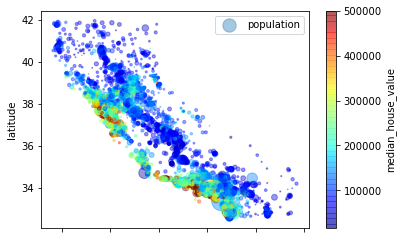

In [32]:
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

# Korrelationen suchen und erkennen
Da der Datensatz nicht zu groß ist, können Sie den Standardkorrelationskoeffizienten (auch Pearson's r genannt) zwischen jedem Paar von Attributen mit der corr()-Methode leicht berechnen.
# Übung 1
Aufgabe 1: Wenden Sie die corr()-Methode auf dem housing-Trainingsdatensatz an.
Aufgabe 2: Lassen Sie sich die Daten mit der print-Methode ausgeben. 
Aufgabe 3: Geben Sie nur die Korrelationen für die durchschnittlichen Hauspreise an und sortieren Sie die Wiedergabe absteigend (Mit der Methode sort_values(ascending=False) können Sie die Werte sortieren lassen).

In [40]:
matrix = housing.corr()
print(matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


Das vielversprechendste Attribut zur Vorhersage des durchschnittlichen Hauswertes ist das durchschnittliche Einkommen, also lassen Sie uns ein Korrelationsstreudiagramm für diese Daten erstellen.

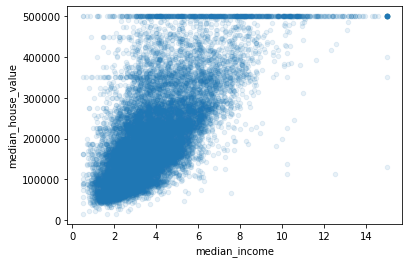

In [42]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

# Analyse von Attributkombinationen und deren Wirkung
Hoffentlich haben Ihnen die vorangegangenen Abschnitte eine Vorstellung davon vermittelt, wie Sie die Daten untersuchen und Erkenntnisse gewinnen können. Sie haben ein paar Datenmängel identifiziert, die Sie vielleicht bereinigen möchten, bevor Sie die Daten einem Algorithmus für maschinelles Lernen zuführen und Sie haben interessante Korrelationen zwischen den Attributen gefunden, insbesondere mit dem Zielattribut. 

Eine letzte Sache, die Sie vielleicht vor der eigentlichen Vorbereitung der Daten für die Algorithmen des maschinellen Lernens tun möchten, ist das Ausprobieren verschiedener Attributkombinationen. Zum Beispiel ist die Gesamtzahl der Räume in einem Bezirk nicht sehr nützlich, wenn Sie nicht wissen, wie viele Haushalte es gibt. Was Sie wirklich wollen, ist die Anzahl der Räume pro Haushalt zu untersuchen. Ebenso ist die Gesamtzahl der Zimmer an sich nicht sehr nützlich. Relevanter wäre wohl die Anzahl der Schlafzimmer pro Anzahl Zimmer. Und die Bevölkerung pro Haushalt scheint auch eine interessante Kombination von Attributen zu sein, die man sich ansehen sollte. Lassen Sie uns diese neuen Attribute erstellen.


# Übung 2
Aufgabe 1: Erstellen Sie in Ihrem housing Datenobjekt ein neues Attribut für die Anzahl Zimmer pro Haushalt.
Aufgabe 2: Erstellen Sie in Ihrem housing Datenobjekt ein neues Attribut für die Anzahl Schlafzimmer pro Gesamtanzahl Zimmer.
Aufgabe 3: Erstellen Sie in Ihrem housing Datenobjekt ein neues Attribut für die Anzahl Einwohner pro Haushalt
Aufgabe 4: Erstellen Sie wieder eine Korrelationsmatrix und geben Sie die Korrelationskoeffizienten für den durchschnittlichen hauspreis aus. Was fällt Ihnen aus?

In [43]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Nicht schlecht. Wenn Sie bis hierhin gekommen sind, kennen Sie die Struktur und den Inhalt Ihrer Daten! Diese Erkundungsrunde muss nicht absolut gründlich sein; es geht vielmehr darum, auf dem richtigen Weg zu beginnen und schnell Erkenntnisse zu gewinnen, die Ihnen helfen, einen ersten halbwegs guten Prototypen zu erhalten. Aber dies ist ein iterativer Prozess: Sobald Sie einen Prototyp zum Laufen gebracht haben, können Sie seine Ergebnisse analysieren, um weitere Erkenntnisse zu gewinnen und zu diesem Explorationsschritt zurückkehren.